[Reference](https://medium.com/i%CC%87stanbuldatascienceacademy/from-web-scraping-to-linear-regression-model-96c01169a305)

# Step 1: Web Scraping via Beautiful Soup

In [ ]:
pip install pytictoc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import numpy as np
from pytictoc import TicToc
from datetime import datetime
import time

In [ ]:
def getAndParseURL(url):
    result = requests.get(url, headers={"User-Agent":"Chrome/103.0.0.0"}) # Safari/537.36. Mozilla/5.0
    soup = bts(result.text, "html.parser")
    return soup

In [ ]:
pages = [] #annual bestsellers&literary fiction
for page in range(1,24): 
    pages.append("https://www.kitapyurdu.com/index.php?route=product/best_sellers&page="+str(page)+"&list_id=18&filter_in_stock=1&filter_in_stock=1")
print(pages[0])
print(pages[-1])
print(len(pages))

https://www.kitapyurdu.com/index.php?route=product/best_sellers&page=1&list_id=18&filter_in_stock=1&filter_in_stock=1
https://www.kitapyurdu.com/index.php?route=product/best_sellers&page=23&list_id=18&filter_in_stock=1&filter_in_stock=1
23


In [ ]:
products = []
for page in pages:
    html = getAndParseURL(page)
    for product in html.findAll("div",{"class":"cover"}):
        products.append(product.a.get("href"))
print(products[:25])

['https://www.kitapyurdu.com/kitap/gece-yarisi-kutuphanesi/582550.html', 'https://www.kitapyurdu.com/kitap/seker-portakali-ciltsiz/10139.html', 'https://www.kitapyurdu.com/kitap/simyaci-ciltsiz/27328.html', 'https://www.kitapyurdu.com/kitap/ben-kirke/512225.html', 'https://www.kitapyurdu.com/kitap/hayvan-ciftligi-ciltsiz/30574.html', 'https://www.kitapyurdu.com/kitap/veronika-olmek-istiyor/18703.html', 'https://www.kitapyurdu.com/kitap/kirmizi-pazartesi/13006.html', 'https://www.kitapyurdu.com/kitap/kaplanin-sirtinda/620136.html', 'https://www.kitapyurdu.com/kitap/cesur-yeni-dunya/21087.html', 'https://www.kitapyurdu.com/kitap/kurk-mantolu-madonna/12064.html', 'https://www.kitapyurdu.com/kitap/fahrenheit-451/455877.html', 'https://www.kitapyurdu.com/kitap/saatleri-ayarlama-enstitusu/4780.html', 'https://www.kitapyurdu.com/kitap/ceyiz/627269.html', 'https://www.kitapyurdu.com/kitap/tiamat-karton-kapak/608374.html', 'https://www.kitapyurdu.com/kitap/icimizdeki-seytan/12065.html', 'https:

In [ ]:
# name = html.find("h1",{"class":"pr_header__heading"}).text.strip()
# print("Name of the Book: ", name)
# author = html.find("a",{"class":"pr_producers__link"}).text.strip()
# print("Author: ", author)
# publisher = html.find("div",{"class":"pr_producers__publisher"}).text.strip()
# print("Publisher: ", publisher)
# release_date = html.find("div",{"class":"attributes"}).find(text=re.compile("Yayın Tarihi")).findNext().text.strip().replace(".","/")
# print("Release Date: ", release_date)
# purchase_info = html.find("div",{"class":"purchase-info"}).text.strip().replace(".","")
# print("Purchase Info: ", purchase_info)
# page_num = html.find("div",{"class":"attributes"}).find(text=re.compile("Sayfa Sayısı:")).findNext().text.strip()
# print("Number of Pages: ", int(page_num))
# cover =  html.find("div",{"class":"attributes"}).find(text=re.compile("Cilt Tipi:")).findNext().text.strip()
# print("Type of the Book Cover: ", cover)
# paper_type = html.find("div",{"class":"attributes"}).find(text=re.compile("Kağıt Cinsi:")).findNext().text.strip()
# print("Type of the Paper: ", paper_type)
# rating = float(html.find("meta", itemprop="ratingValue").attrs["content"].replace(".",""))
# print("Rate: ", rating)
# rating_count = int(html.find("meta", itemprop="ratingCount").attrs["content"].replace(".",""))
# print("Rating Count: ", rating_count)
# review_count = int(html.find("meta", itemprop="reviewCount").attrs["content"].replace(".",""))
# print("Review Count: ", review_count)
# fav_count = int(html.find("span",{"id":"favorite-count"}).text.strip().replace(".",""))
# print("Fav Count: ", fav_count)
# to_read_list = html.find("li",{"class":"readlists__item"}).text.strip("\n").strip().replace(".","")
# print("To-Read List Count: ", to_read_list)
# price = float(html.find("div",{"class":"price__item"}).text.strip().replace(",","."))
# print("Price: ", price)
# discount = html.find("p",{"class":"info-text"}).text.replace(",",".")
# print("Discount: ", discount)
# manufacturer_price = float(html.find("span",{"class":"pr_price__strikeout-list"}).text.strip().replace(",","."))
# print("Manufacturer Price: ", manufacturer_price)
# df = pd.DataFrame.from_records(features, columns=df_columns)
# df.to_pickle("./kitap_yurdu_literary.pkl")

In [ ]:
with TicToc():
    features = []
    for product in products:
        html = getAndParseURL(product)
        try:
            name = html.find("h1",{"class":"pr_header__heading"}).text.strip()
        except:
            name = np.nan
        try:
            author = html.find("a",{"class":"pr_producers__link"}).text.strip()
        except:
            author = np.nan
        try:
            publisher = html.find("div",{"class":"pr_producers__publisher"}).text.strip()
        except:
            publisher = np.nan   
        try:
            release_date = html.find("div",{"class":"attributes"}).find(text=re.compile("Yayın Tarihi")).findNext().text.strip().replace(".","/")
        except:
            release_date = np.nan
        try:
            purchase_info = html.find("div",{"class":"purchase-info"}).text.strip().replace(".","")
        except:       
            purchase_info = np.nan
        try:
            page_num = int(html.find("div",{"class":"attributes"}).find(text=re.compile("Sayfa Sayısı:")).findNext().text.strip())
        except:
            page_num = np.nan
        try:
            cover =  html.find("div",{"class":"attributes"}).find(text=re.compile("Cilt Tipi:")).findNext().text.strip()
        except:
            cover = np.nan
        try:
            paper_type = html.find("div",{"class":"attributes"}).find(text=re.compile("Kağıt Cinsi:")).findNext().text.strip()
        except:
            paper_type = np.nan
        try:
            rating = float(html.find("meta", itemprop="ratingValue").attrs["content"].replace(".",""))
        except:
            rating = np.nan
        try:
            rating_count = int(html.find("meta", itemprop="ratingCount").attrs["content"].replace(".",""))
        except:
            rating_count = np.nan
        try:
            review_count = int(html.find("meta", itemprop="reviewCount").attrs["content"].replace(".",""))
        except:
            review_count = np.nan
        try:
            price = float(html.find("div",{"class":"price__item"}).text.strip().replace(",","."))
        except:
            price = np.nan
        try:
            discount = html.find("p",{"class":"info-text"}).text.replace(",",".")
        except:
            discount = np.nan
        try:
            manufacturer_price = float(html.find("span",{"class":"pr_price__strikeout-list"}).text.strip().replace(",","."))
        except:
            manufacturer_price = np.nan
        try:
            fav_count = int(html.find("span",{"id":"favorite-count"}).text.strip().replace(".",""))
        except:
            fav_count = np.nan
        try:
             to_read_list = html.find("li",{"class":"readlists__item"}).text.strip("\n").strip().replace(".","")
        except:
            to_read_list = np.nan


        features.append([name, author, publisher, release_date, purchase_info, page_num, cover, paper_type, 
                         rating, rating_count, review_count, fav_count, to_read_list, price, discount, manufacturer_price])
        time.sleep(1)

    df_columns = ["Name of the Book","Author","Publisher","Release Date","Purchase Info","Number of Pages","Type of the Book Cover",
                  "Type of the Paper","Rate","Rating Count","Review Count","Fav Count","To-Read List Count","Price","Discount","Manufacturer Price"]

    df = pd.DataFrame.from_records(features, columns=df_columns)
    df.to_pickle("./kitap_yurdu_literary.pkl") 

Elapsed time is 1159.283453 seconds.


In [ ]:
html = getAndParseURL("https://www.kitapyurdu.com/kitap/gece-yarisi-kutuphanesi/582550.html")
name = html.find("h1",{"class":"pr_header__heading"}).text.strip()
print("Name of the Book: ", name)
author = html.find("a",{"class":"pr_producers__link"}).text.strip()
print("Author: ", author)
publisher = html.find("div",{"class":"pr_producers__publisher"}).text.strip()
print("Publisher: ", publisher)
release_date = html.find("div",{"class":"attributes"}).find(text=re.compile("Yayın Tarihi")).findNext().text.strip().replace(".","/")
print("Release Date: ", release_date)
purchase_info = html.find("div",{"class":"purchase-info"}).text.strip().replace(".","")
print("Purchase Info: ", purchase_info)
page_num = html.find("div",{"class":"attributes"}).find(text=re.compile("Sayfa Sayısı:")).findNext().text.strip()
print("Number of Pages: ", int(page_num))
cover =  html.find("div",{"class":"attributes"}).find(text=re.compile("Cilt Tipi:")).findNext().text.strip()
print("Type of the Book Cover: ", cover)
paper_type = html.find("div",{"class":"attributes"}).find(text=re.compile("Kağıt Cinsi:")).findNext().text.strip()
print("Type of the Paper: ", paper_type)
rating = float(html.find("meta", itemprop="ratingValue").attrs["content"].replace(".",""))
print("Rate: ", rating)
rating_count = int(html.find("meta", itemprop="ratingCount").attrs["content"].replace(".",""))
print("Rating Count: ", rating_count)
review_count = int(html.find("meta", itemprop="reviewCount").attrs["content"].replace(".",""))
print("Review Count: ", review_count)
fav_count = int(html.find("span",{"id":"favorite-count"}).text.strip().replace(".",""))
print("Fav Count: ", fav_count)
to_read_list = html.find("li",{"class":"readlists__item"}).text.strip("\n").strip().replace(".","")
print("To-Read List Count: ", to_read_list)
price = float(html.find("div",{"class":"price__item"}).text.strip().replace(",","."))
print("Price: ", price)
discount = html.find("p",{"class":"info-text"}).text.replace(",",".")
print("Discount: ", discount)
manufacturer_price = float(html.find("span",{"class":"pr_price__strikeout-list"}).text.strip().replace(",","."))
print("Manufacturer Price: ", manufacturer_price)

Name of the Book:  Gece Yarısı Kütüphanesi
Author:  Matt Haig
Publisher:  DOMİNGO YAYINEVİ
Release Date:  23/02/2022
Purchase Info:  Bu üründen 52599 adet satın alınmıştır
Number of Pages:  283
Type of the Book Cover:  Karton Kapak
Type of the Paper:  Kitap Kağıdı
Rate:  5.0
Rating Count:  1223
Review Count:  756
Fav Count:  24911
To-Read List Count:  Okuyacağım                


                    2655
Price:  37.76
Discount:  Kazancınız:  46.24
Manufacturer Price:  84.0


In [ ]:
pages = [] #çok satanlar-edebiyatdışı-yıllık
for page in range(1,23): 
    pages.append("https://www.kitapyurdu.com/index.php?route=product/best_sellers&page="+str(page)+"&list_id=21&filter_in_stock=1&filter_in_stock=1")
print(pages[0])
print(pages[-1])
print(len(pages))

https://www.kitapyurdu.com/index.php?route=product/best_sellers&page=1&list_id=21&filter_in_stock=1&filter_in_stock=1
https://www.kitapyurdu.com/index.php?route=product/best_sellers&page=22&list_id=21&filter_in_stock=1&filter_in_stock=1
22


In [ ]:
products = []
for page in pages:
    html = getAndParseURL(page)
    for product in html.findAll("div",{"class":"cover"}):
        products.append(product.a.get("href"))
print(products[:25])

['https://www.kitapyurdu.com/kitap/var-misin-guclu-bir-yasam-icin-oneriler/568760.html', 'https://www.kitapyurdu.com/kitap/atomik-aliskanliklar/540793.html', 'https://www.kitapyurdu.com/kitap/insan-gelecegini-nasil-kurar-kendini-insa-etmenin-yollari/609007.html', 'https://www.kitapyurdu.com/kitap/benim-zurafam-ucabilir/589761.html', 'https://www.kitapyurdu.com/kitap/ezbere-yasayanlar-vazgecemedigimiz-aliskanliklarimizin-kokenleri/605078.html', 'https://www.kitapyurdu.com/kitap/pal-sokagi-cocuklari/125370.html', 'https://www.kitapyurdu.com/kitap/delifisek/13565.html', 'https://www.kitapyurdu.com/kitap/insanin-anlam-arayisi/131878.html', 'https://www.kitapyurdu.com/kitap/uzaya-giden-tren/623243.html', 'https://www.kitapyurdu.com/kitap/gelistiren-annebaba/599028.html', 'https://www.kitapyurdu.com/kitap/dervisin-teselli-koleksiyonu-dogudan-batidan-99-teselli-/421503.html', 'https://www.kitapyurdu.com/kitap/zaman-bisikleti/57439.html', 'https://www.kitapyurdu.com/kitap/101-deyim-101-oyku/39

In [ ]:
with TicToc():
    features = []
    for product in products:
        html = getAndParseURL(product)
        try:
            name = html.find("h1",{"class":"pr_header__heading"}).text.strip()
        except:
            name = np.nan
        try:
            author = html.find("a",{"class":"pr_producers__link"}).text.strip()
        except:
            author = np.nan
        try:
            publisher = html.find("div",{"class":"pr_producers__publisher"}).text.strip()
        except:
            publisher = np.nan   
        try:
            release_date = html.find("div",{"class":"attributes"}).find(text=re.compile("Yayın Tarihi")).findNext().text.strip().replace(".","/")
        except:
            release_date = np.nan
        try:
            purchase_info = html.find("div",{"class":"purchase-info"}).text.strip().replace(".","")
        except:       
            purchase_info = np.nan
        try:
            page_num = int(html.find("div",{"class":"attributes"}).find(text=re.compile("Sayfa Sayısı:")).findNext().text.strip())
        except:
            page_num = np.nan
        try:
            cover =  html.find("div",{"class":"attributes"}).find(text=re.compile("Cilt Tipi:")).findNext().text.strip()
        except:
            cover = np.nan
        try:
            paper_type = html.find("div",{"class":"attributes"}).find(text=re.compile("Kağıt Cinsi:")).findNext().text.strip()
        except:
            paper_type = np.nan
        try:
            rating = float(html.find("meta", itemprop="ratingValue").attrs["content"].replace(".",""))
        except:
            rating = np.nan
        try:
            rating_count = int(html.find("meta", itemprop="ratingCount").attrs["content"].replace(".",""))
        except:
            rating_count = np.nan
        try:
            review_count = int(html.find("meta", itemprop="reviewCount").attrs["content"].replace(".",""))
        except:
            review_count = np.nan
        try:
            price = float(html.find("div",{"class":"price__item"}).text.strip().replace(",","."))
        except:
            price = np.nan
        try:
            discount = html.find("p",{"class":"info-text"}).text.replace(",",".")
        except:
            discount = np.nan
        try:
            manufacturer_price = float(html.find("span",{"class":"pr_price__strikeout-list"}).text.strip().replace(",","."))
        except:
            manufacturer_price = np.nan
        try:
            fav_count = int(html.find("span",{"id":"favorite-count"}).text.strip().replace(".",""))
        except:
            fav_count = np.nan
        try:
             to_read_list = html.find("li",{"class":"readlists__item"}).text.strip("\n").strip().replace(".","")
        except:
            to_read_list = np.nan


        features.append([name, author, publisher, release_date, purchase_info, page_num, cover, paper_type, 
                         rating, rating_count, review_count, fav_count, to_read_list, price, discount, manufacturer_price])
        time.sleep(1)

    df_columns = ["Name of the book","Author","Publisher","Release Date","Purchase Info","Number of Pages","Type of the Book Cover",
                  "Type of the Paper","Rate","Rating Count","Review Count","Fav Count","To-Read List Count","Price","Discount","Manufacturer Price"]

    df = pd.DataFrame.from_records(features, columns=df_columns)
    df.to_pickle("./kitap_yurdu_edebiyat_disi.pkl") 


Elapsed time is 1132.377391 seconds.


# Step 2: Feature Engineering


In [ ]:
!ls

kitap_yurdu_edebiyat_disi.pkl  kitap_yurdu_literary.pkl  sample_data


In [ ]:
with TicToc():
    ky_ed = pd.read_pickle("./kitap_yurdu_edebiyat_disi.pkl") 
    ky = pd.read_pickle("./kitap_yurdu_literary.pkl") 
ky = ky.append(ky_ed, ignore_index=True)
ky.head(10)

Elapsed time is 0.017924 seconds.


,Name of the Book,Author,Publisher,Release Date,Purchase Info,Number of Pages,Type of the Book Cover,Type of the Paper,Rate,Rating Count,Review Count,Fav Count,To-Read List Count,Price,Discount,Manufacturer Price,Name of the book
0,Gece Yarısı Kütüphanesi,Matt Haig,DOMİNGO YAYINEVİ,23/02/2022,Bu üründen 52599 adet satın alınmıştır,283.0,Karton Kapak,Kitap Kağıdı,5.0,1223,756,24911,Okuyacağım \n\n\n ...,37.76,Kazancınız: 46.24,84.0,NaN
1,Şeker Portakalı (Ciltsiz),Jose Mauro De Vasconcelos,CAN YAYINLARI,06/09/2019,Bu üründen 272308 adet satın alınmıştır,182.0,Karton Kapak,Kitap Kağıdı,5.0,21946,10140,61991,Okuyacağım \n\n\n ...,33.75,Kazancınız: 41.25,75.0,NaN
2,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,28/09/2021,Bu üründen 187422 adet satın alınmıştır,184.0,Karton Kapak,Kitap Kağıdı,5.0,15987,7589,56500,Okuyacağım \n\n\n ...,34.65,Kazancınız: 42.35,77.0,NaN
3,"Ben, Kirke",Madeline Miller,İTHAKİ YAYINLARI,25/01/2021,Bu üründen 51687 adet satın alınmıştır,408.0,Karton Kapak,Kitap Kağıdı,4.0,1765,950,25108,Okuyacağım \n\n\n ...,45.01,Kazancınız: 44.99,90.0,NaN
4,Hayvan Çiftliği (Ciltsiz),George Orwell,CAN YAYINLARI,04/10/2019,Bu üründen 201636 adet satın alınmıştır,152.0,Karton Kapak,Kitap Kağıdı,5.0,19000,8749,43491,Okuyacağım \n\n\n ...,14.40,Kazancınız: 17.60,32.0,NaN
5,Veronika Ölmek İstiyor,Paulo Coelho,CAN YAYINLARI,06/08/2019,Bu üründen 65830 adet satın alınmıştır,198.0,Karton Kapak,Kitap Kağıdı,5.0,3755,1930,35609,Okuyacağım \n\n\n ...,43.20,Kazancınız: 36.80,80.0,NaN
6,Kırmızı Pazartesi,Gabriel Garcia Marquez,CAN YAYINLARI,15/04/2019,Bu üründen 111983 adet satın alınmıştır,120.0,Karton Kapak,Kitap Kağıdı,4.0,10042,4407,39291,Okuyacağım \n\n\n ...,23.40,Kazancınız: 28.60,52.0,NaN
7,Kaplanın Sırtında,Zülfü Livaneli,İNKILAP KİTABEVİ,25/06/2022,Bu üründen 14365 adet satın alınmıştır,324.0,Karton Kapak,Kitap Kağıdı,5.0,251,156,6978,Okuyacağım \n\n\n ...,52.71,Kazancınız: 32.29,85.0,NaN
8,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,20/08/2021,Bu üründen 112886 adet satın alınmıştır,272.0,Karton Kapak,Kitap Kağıdı,5.0,6835,3152,38706,Okuyacağım \n\n\n ...,30.11,Kazancınız: 39.89,70.0,NaN
9,Kürk Mantolu Madonna,Sabahattin Ali,YAPI KREDİ YAYINLARI,13/06/2022,Bu üründen 210503 adet satın alınmıştır,160.0,Karton Kapak,Kitap Kağıdı,5.0,23796,12238,42870,Okuyacağım \n\n\n ...,9.00,Kazancınız: 10.00,19.0,NaN


In [ ]:
def split_int(string):
    for i in string.split():
        try:
            str_to_num = int(i)
            return str_to_num
        except ValueError:
            pass

In [ ]:
def split_float(string):
    for i in string.split():
        try:
            str_to_num = float(i)
            return str_to_num
        except ValueError:
            pass

In [ ]:
ky["Purchase Info"] = ky.loc[ky["Purchase Info"].notnull(), "Purchase Info"].apply(split_int)
ky["Discount"] = ky.loc[ky["Discount"].notnull(), "Discount"].apply(split_float)
ky["To-Read List Count"] = ky.loc[ky["To-Read List Count"].notnull(), "To-Read List Count"].apply(split_int)
ky.drop_duplicates(inplace=True) 
ky["Type of the Book Cover"].unique()
book_cover_dict = { 'Karton Kapak':1, 'Ciltli':2}
ky["Type of the Book Cover"] = ky["Type of the Book Cover"].map(book_cover_dict)
ky["Type of the Book Cover"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
876    1.0
877    1.0
878    1.0
879    1.0
880    1.0
Name: Type of the Book Cover, Length: 881, dtype: float64

In [ ]:
ky["Type of the Paper"].unique()

array(['Kitap Kağıdı', '3. Hm. Kağıt', '2. Hm. Kağıt', '1. Hm. Kağıt',
       'Kuşe Kağıt', nan], dtype=object)

In [ ]:
paper_dict = { 'Kitap Kağıdı':2,
                '2. Hm. Kağıt':2,
                '1. Hm. Kağıt':3,                  
                '3. Hm. Kağıt':1,
                'Kuşe Kağıt':4 }

In [ ]:
# label encoding for paper type
ky['Type of the Paper'] = ky['Type of the Paper'].map(paper_dict)
ky['Type of the Paper']

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
876    2.0
877    2.0
878    2.0
879    2.0
880    2.0
Name: Type of the Paper, Length: 881, dtype: float64

In [ ]:
"""rd = datetime.strptime(release_date, "%d/%m/%Y").date()
today = datetime.now().date()
time_since_publ = (today-rd).days
print(time_since_publ)"""

'rd = datetime.strptime(release_date, "%d/%m/%Y").date()\ntoday = datetime.now().date()\ntime_since_publ = (today-rd).days\nprint(time_since_publ)'

In [ ]:
type(ky.loc[0,'Release Date'])

str

In [ ]:
today = datetime.now().date()
def time_passed(release_date):   
    rd = datetime.strptime(release_date, "%d/%m/%Y").date()
    time_since_publ = (today-rd).days
    return(time_since_publ)

In [ ]:
ky['Time Passed Since Publication'] = ky.loc[ky["Release Date"].notnull(), "Release Date"].apply(time_passed)

In [ ]:
ky = ky.loc[:,ky.columns != "Release Date"]

In [ ]:
ky.columns

Index(['Name of the Book', 'Author', 'Publisher', 'Purchase Info',
       'Number of Pages', 'Type of the Book Cover', 'Type of the Paper',
       'Rate', 'Rating Count', 'Review Count', 'Fav Count',
       'To-Read List Count', 'Price', 'Discount', 'Manufacturer Price',
       'Name of the book', 'Time Passed Since Publication'],
      dtype='object')

In [ ]:
ky_lr = ky.loc[:, ~ky.columns.isin(["Name of the book","Author","Publisher"])]
ky_lr.head(10)

,Name of the Book,Purchase Info,Number of Pages,Type of the Book Cover,Type of the Paper,Rate,Rating Count,Review Count,Fav Count,To-Read List Count,Price,Discount,Manufacturer Price,Time Passed Since Publication
0,Gece Yarısı Kütüphanesi,52599.0,283.0,1.0,2.0,5.0,1223,756,24911,2655.0,37.76,46.24,84.0,292.0
1,Şeker Portakalı (Ciltsiz),272308.0,182.0,1.0,2.0,5.0,21946,10140,61991,7902.0,33.75,41.25,75.0,1193.0
2,Simyacı (Ciltsiz),187422.0,184.0,1.0,2.0,5.0,15987,7589,56500,5538.0,34.65,42.35,77.0,440.0
3,"Ben, Kirke",51687.0,408.0,1.0,2.0,4.0,1765,950,25108,2200.0,45.01,44.99,90.0,686.0
4,Hayvan Çiftliği (Ciltsiz),201636.0,152.0,1.0,2.0,5.0,19000,8749,43491,6071.0,14.40,17.60,32.0,1165.0
5,Veronika Ölmek İstiyor,65830.0,198.0,1.0,2.0,5.0,3755,1930,35609,2892.0,43.20,36.80,80.0,1224.0
6,Kırmızı Pazartesi,111983.0,120.0,1.0,2.0,4.0,10042,4407,39291,4570.0,23.40,28.60,52.0,1337.0
7,Kaplanın Sırtında,14365.0,324.0,1.0,2.0,5.0,251,156,6978,786.0,52.71,32.29,85.0,170.0
8,Cesur Yeni Dünya,112886.0,272.0,1.0,2.0,5.0,6835,3152,38706,4647.0,30.11,39.89,70.0,479.0
9,Kürk Mantolu Madonna,210503.0,160.0,1.0,2.0,5.0,23796,12238,42870,5667.0,9.00,10.00,19.0,182.0


In [ ]:
ky_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 880
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name of the Book               441 non-null    object 
 1   Purchase Info                  879 non-null    float64
 2   Number of Pages                874 non-null    float64
 3   Type of the Book Cover         879 non-null    float64
 4   Type of the Paper              878 non-null    float64
 5   Rate                           881 non-null    float64
 6   Rating Count                   881 non-null    int64  
 7   Review Count                   881 non-null    int64  
 8   Fav Count                      881 non-null    int64  
 9   To-Read List Count             878 non-null    float64
 10  Price                          881 non-null    float64
 11  Discount                       881 non-null    float64
 12  Manufacturer Price             880 non-null    flo

In [ ]:
len(ky_lr)

881

In [ ]:
ky_lr[ky_lr['Number of Pages'].isnull()].index.tolist()

[306, 687, 793, 794, 806, 811, 837]

In [ ]:
ky_lr = ky_lr.drop(labels=[303, 412, 647, 788, 795, 797, 817, 840, 847, 882], axis=0)

KeyError: ignored

In [ ]:
ky_lr[ky_lr['Time Passed Since Publication'].isnull()].index.tolist()

[567, 818, 872]

In [ ]:
ky_lr = ky_lr.drop(labels=[603, 811], axis=0)

In [ ]:
def mean_std_filling(column_name):    
    mean = column_name.mean()
    std = column_name.std()
    is_null = column_name.isna().sum()
    print('Mean:', mean, 'Std:', std, 'Null:', is_null)
    rand_float = np.random.uniform(0, mean + std, size = is_null)
    print('Numbers:', rand_float[:25])

    column_name[np.isnan(column_name)] = rand_float
    column_name = column_name.astype(float)

In [ ]:
mean_std_filling(ky_lr['Manufacturer Price'])

Mean: 65.59693621867882 Std: 49.64755179875965 Null: 1
Numbers: [65.70625857]


<ipython-input-51-89a1961c8de6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_name[np.isnan(column_name)] = rand_float


In [ ]:
ky_lr[ky_lr['Type of the Paper'].isnull()].index.tolist()

[687, 781]

In [ ]:
ky_lr.loc[684,'Type of the Paper'] = 2

In [ ]:
ky_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 880
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name of the Book               441 non-null    object 
 1   Purchase Info                  878 non-null    float64
 2   Number of Pages                873 non-null    float64
 3   Type of the Book Cover         878 non-null    float64
 4   Type of the Paper              877 non-null    float64
 5   Rate                           879 non-null    float64
 6   Rating Count                   879 non-null    int64  
 7   Review Count                   879 non-null    int64  
 8   Fav Count                      879 non-null    int64  
 9   To-Read List Count             877 non-null    float64
 10  Price                          879 non-null    float64
 11  Discount                       879 non-null    float64
 12  Manufacturer Price             879 non-null    flo

In [ ]:
from sklearn.model_selection import train_test_split
ky_lr = ky_lr.dropna()
X = ky_lr.loc[:,ky_lr.columns != "Price"]
y = ky_lr.Price
X = X.drop(['Name of the Book'],axis=1)
# Train/Test 
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train/Validation 
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
print('X Train:', x_train.shape)
print('X Validation:', x_cv.shape)
print('X test:', x_test.shape)

X Train: (281, 12)
X Validation: (71, 12)
X test: (88, 12)


In [ ]:
x_train

,Purchase Info,Number of Pages,Type of the Book Cover,Type of the Paper,Rate,Rating Count,Review Count,Fav Count,To-Read List Count,Discount,Manufacturer Price,Time Passed Since Publication
197,29660.0,510.0,1.0,2.0,5.0,3371,1842,12921,1381.0,18.00,72.0,3930.0
331,11551.0,476.0,1.0,2.0,4.0,893,371,6257,702.0,33.32,98.0,1267.0
322,2936.0,72.0,1.0,2.0,5.0,68,31,975,92.0,2.10,10.0,744.0
431,828.0,144.0,1.0,2.0,4.0,15,8,501,50.0,22.00,55.0,236.0
173,12175.0,296.0,1.0,2.0,4.0,898,494,9547,687.0,25.19,94.0,718.0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,13496.0,408.0,1.0,1.0,5.0,751,353,8256,614.0,30.02,95.0,1064.0
362,15059.0,632.0,1.0,2.0,5.0,1103,591,9130,837.0,61.20,180.0,1119.0
303,1050.0,296.0,1.0,2.0,5.0,25,15,837,77.0,31.16,89.0,166.0
270,5020.0,632.0,1.0,2.0,5.0,244,146,2444,139.0,38.50,110.0,348.0


In [ ]:
from sklearn.linear_model import LinearRegression

# Model Construction
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

# MSE 
mse = np.mean((pred - y_cv)**2)
print("MSE: ", mse)

# R2 Score
print("R2 Score: ", lreg.score(x_cv, y_cv))

MSE:  1.6174930762668323e-07
R2 Score:  0.9999999997111438


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def extract_whiskers(data):
    median_value = np.median(data) # Median
    upper_quartile = np.percentile(data, 75) # 75%
    lower_quartile = np.percentile(data, 25) # 25% 

    iqr = upper_quartile - lower_quartile # Interquartile Range
    upper = data[data<=upper_quartile+1.5*iqr].max()
    print("Upper Whisker:", data[data<=upper_quartile+1.5*iqr].max()) # Max
    #print("Lower Whisker:", data[data>=lower_quartile-1.5*iqr].min()) # Min
    return upper

In [ ]:
ky_lr.columns

Index(['Name of the Book', 'Purchase Info', 'Number of Pages',
       'Type of the Book Cover', 'Type of the Paper', 'Rate', 'Rating Count',
       'Review Count', 'Fav Count', 'To-Read List Count', 'Price', 'Discount',
       'Manufacturer Price', 'Time Passed Since Publication'],
      dtype='object')

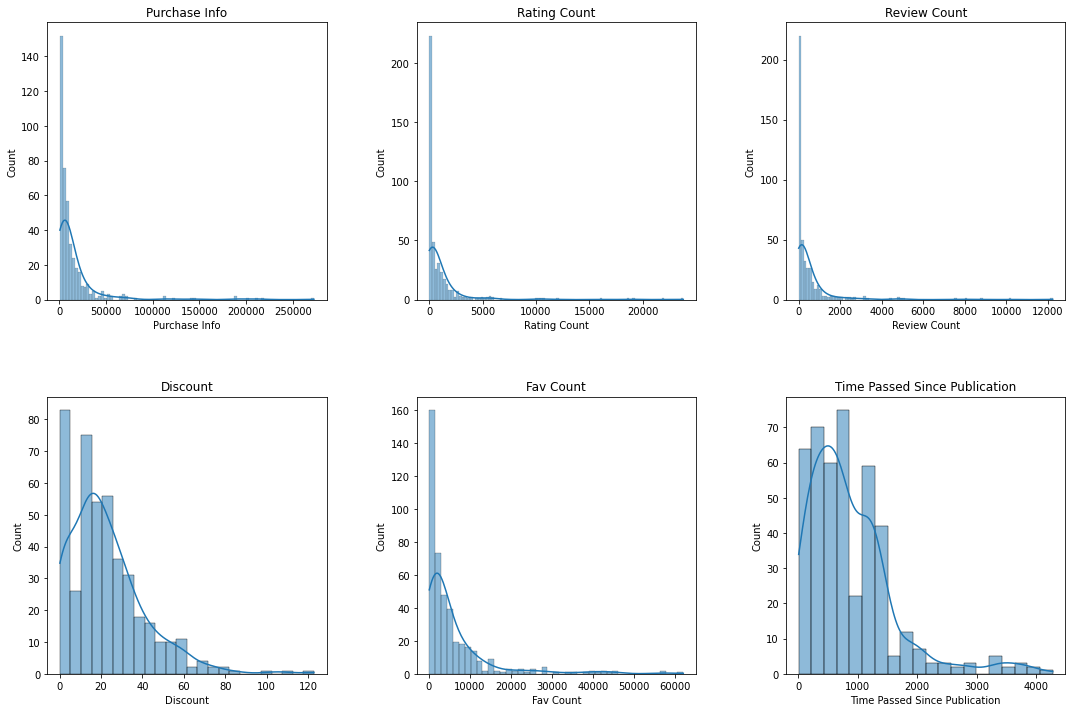

In [ ]:
fig, axes = plt.subplots(2, 3)
sns.histplot(data = ky_lr['Purchase Info'], kde=True, ax=axes[0,0]).set_title("Purchase Info")
sns.histplot(data = ky_lr['Rating Count'], kde=True, ax=axes[0,1]).set_title("Rating Count")
sns.histplot(data = ky_lr['Review Count'], kde=True, ax=axes[0,2]).set_title("Review Count")
sns.histplot(data = ky_lr['Discount'], kde=True, ax=axes[1,0]).set_title("Discount")
sns.histplot(data = ky_lr['Fav Count'], kde=True, ax=axes[1,1]).set_title("Fav Count")
sns.histplot(data = ky_lr['Time Passed Since Publication'], kde=True, ax=axes[1,2]).set_title("Time Passed Since Publication")


fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout(h_pad=5, w_pad=5)

In [ ]:
extract_whiskers(ky_lr['Purchase Info'])

Upper Whisker: 32962.0


32962.0

In [ ]:
pi = extract_whiskers(ky_lr['Purchase Info'])
rac = extract_whiskers(ky_lr['Rating Count'])
rec = extract_whiskers(ky_lr['Review Count'])
dc = extract_whiskers(ky_lr['Discount'])
fc = extract_whiskers(ky_lr['Fav Count'])
tsp = extract_whiskers(ky_lr['Time Passed Since Publication'])

Upper Whisker: 32962.0
Upper Whisker: 2421
Upper Whisker: 1203
Upper Whisker: 60.0
Upper Whisker: 14770
Upper Whisker: 2324.0


In [ ]:
ky_lr = ky_lr.loc[ky_lr['Purchase Info'] <= pi]
ky_lr = ky_lr.loc[ky_lr['Rating Count'] <= rac]
ky_lr = ky_lr.loc[ky_lr['Review Count'] <= rec]
ky_lr = ky_lr.loc[ky_lr['Discount'] <= dc]
ky_lr = ky_lr.loc[ky_lr['Fav Count'] <= fc]
ky_lr = ky_lr.loc[ky_lr['Time Passed Since Publication'] <= tsp]

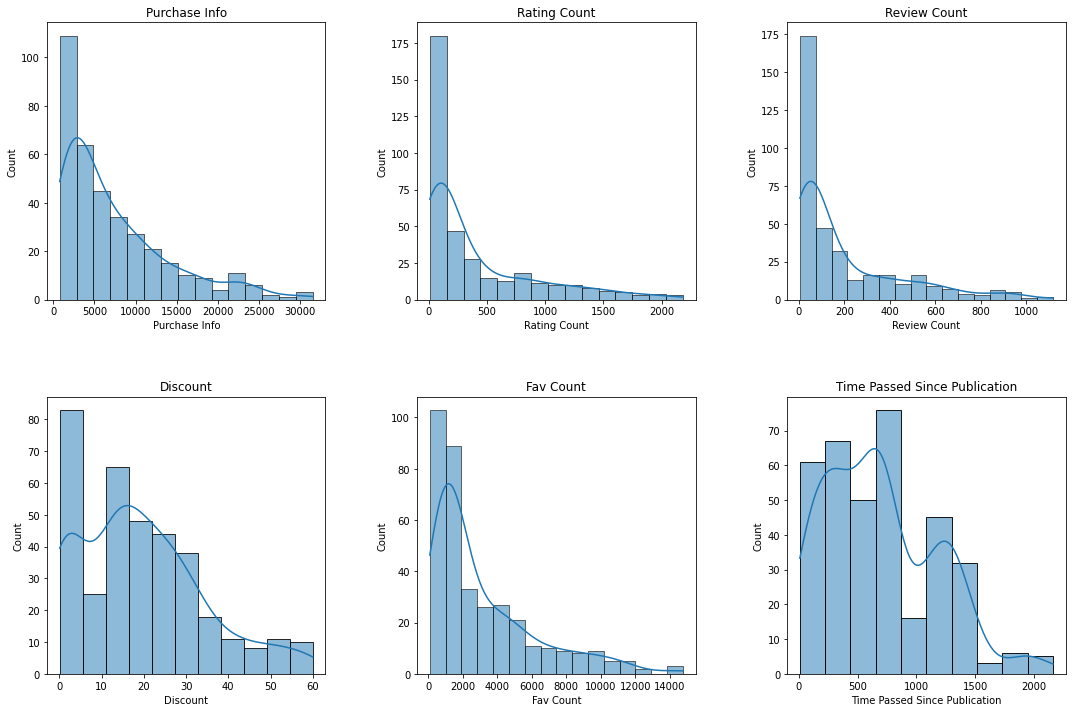

In [ ]:
fig, axes = plt.subplots(2, 3)
sns.histplot(data = ky_lr['Purchase Info'], kde=True, ax=axes[0,0]).set_title("Purchase Info")
sns.histplot(data = ky_lr['Rating Count'], kde=True, ax=axes[0,1]).set_title("Rating Count")
sns.histplot(data = ky_lr['Review Count'], kde=True, ax=axes[0,2]).set_title("Review Count")
sns.histplot(data = ky_lr['Discount'], kde=True, ax=axes[1,0]).set_title("Discount")
sns.histplot(data = ky_lr['Fav Count'], kde=True, ax=axes[1,1]).set_title("Fav Count")
sns.histplot(data = ky_lr['Time Passed Since Publication'], kde=True, ax=axes[1,2]).set_title("Time Passed Since Publication")


fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout(h_pad=5, w_pad=5)

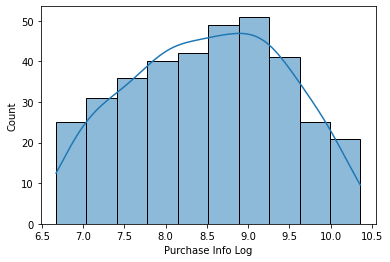

In [ ]:
ky_lr['Purchase Info Log'] = np.log(ky_lr['Purchase Info'])
sns.histplot(data = ky_lr['Purchase Info Log'], kde=True);

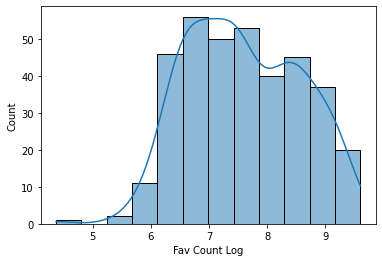

In [ ]:
ky_lr['Fav Count Log'] = np.log(ky_lr['Fav Count'])
sns.histplot(data = ky_lr['Fav Count Log'], kde=True);

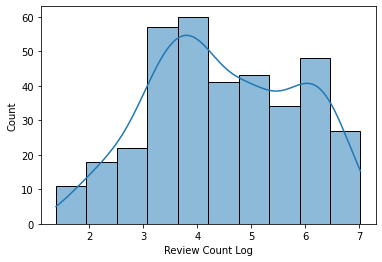

In [ ]:
ky_lr['Review Count Log'] = np.log(ky_lr['Review Count'])
sns.histplot(data = ky_lr['Review Count Log'], kde=True);

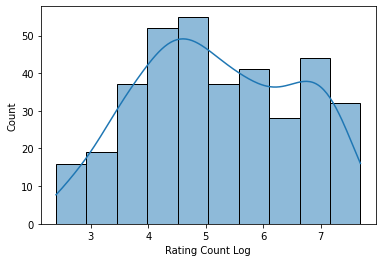

In [ ]:
ky_lr['Rating Count Log'] = np.log(ky_lr['Rating Count'])
sns.histplot(data = ky_lr['Rating Count Log'], kde=True);

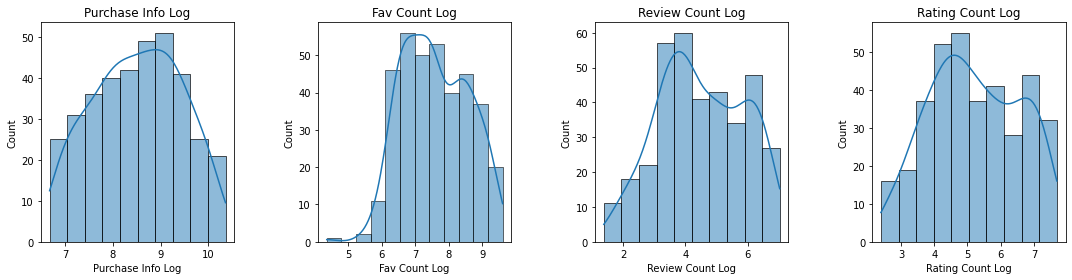

In [ ]:
fig, axes = plt.subplots(1, 4)
sns.histplot(data = ky_lr['Purchase Info Log'], kde=True, ax=axes[0]).set_title("Purchase Info Log");
sns.histplot(data = ky_lr['Fav Count Log'], kde=True, ax=axes[1]).set_title("Fav Count Log");
sns.histplot(data = ky_lr['Review Count Log'], kde=True, ax=axes[2]).set_title("Review Count Log");
sns.histplot(data = ky_lr['Rating Count Log'], kde=True, ax=axes[3]).set_title("Rating Count Log");

fig.set_figheight(4)
fig.set_figwidth(15)
fig.tight_layout(h_pad=5, w_pad=5)

In [ ]:
ky_lr = ky_lr.drop(["Purchase Info","Fav Count", "Review Count","Rating Count"], axis=1)

In [ ]:
ky_lr

,Name of the Book,Number of Pages,Type of the Book Cover,Type of the Paper,Rate,To-Read List Count,Price,Discount,Manufacturer Price,Time Passed Since Publication,Purchase Info Log,Fav Count Log,Review Count Log,Rating Count Log
7,Kaplanın Sırtında,324.0,1.0,2.0,5.0,786.0,52.71,32.29,85.0,170.0,9.572550,8.850518,5.049856,5.525453
12,Çeyiz,176.0,1.0,2.0,5.0,374.0,34.48,25.52,60.0,70.0,9.186560,7.750184,4.204693,4.499810
13,Tiamat (Karton Kapak),160.0,1.0,2.0,4.0,446.0,29.97,15.03,45.0,300.0,9.152817,8.172447,5.030438,5.620401
16,Kayıp Tanrılar Ülkesi,504.0,1.0,2.0,5.0,1538.0,47.58,47.42,95.0,152.0,10.359265,9.275754,6.320768,6.792344
18,Bir Aşk Masalı,256.0,1.0,2.0,4.0,659.0,35.24,24.76,60.0,63.0,9.134862,8.261268,4.317488,4.779123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Allah Cümlemizi Korusun,141.0,1.0,2.0,5.0,305.0,29.70,15.30,45.0,1099.0,9.209640,7.857868,5.713733,6.484635
434,Dindar Bir Doktor Hanım,296.0,1.0,2.0,5.0,353.0,52.49,22.51,75.0,487.0,9.243485,8.289288,5.529429,6.188264
435,Zürafa Sözü,68.0,1.0,2.0,5.0,43.0,33.48,11.52,45.0,693.0,7.738052,6.126869,3.583519,4.127134
438,Coşkuyla Ölmek,191.0,1.0,2.0,5.0,174.0,53.44,19.56,73.0,40.0,8.253748,7.721792,4.736198,5.476464


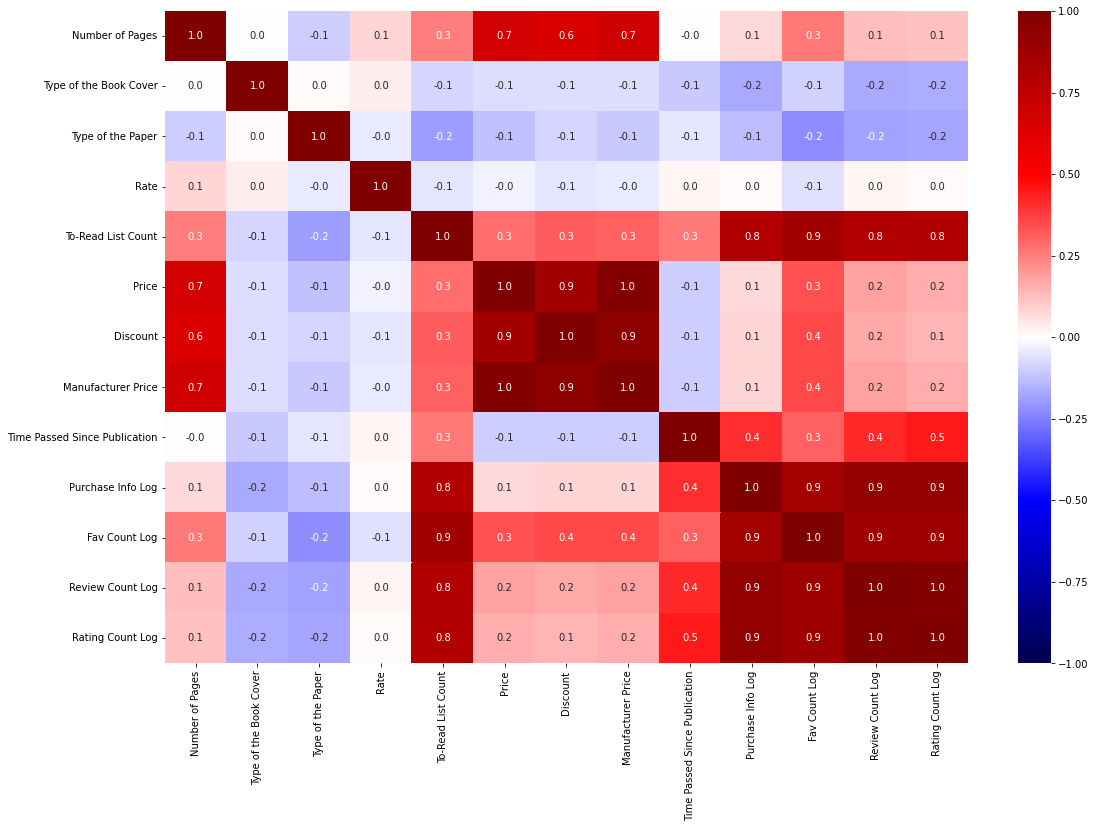

In [ ]:
plt.figure(figsize=[18,12])
sns.heatmap(ky_lr.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f');

In [ ]:
corr_matrix = ky_lr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

<ipython-input-90-c8106e1ffada>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
to_drop

['Discount',
 'Manufacturer Price',
 'Fav Count Log',
 'Review Count Log',
 'Rating Count Log']

In [ ]:
X = ky_lr.drop(columns=['Name of the Book','Review Count Log', "Manufacturer Price","Price"])
y = ky_lr.Price


X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

mse_cv = np.mean((pred - y_cv)**2)

print("Validation Score: ", lreg.score(x_cv, y_cv))
print("MSE: ", mse)

Validation Score:  0.8028981551404556
MSE:  1.6174930762668323e-07


In [ ]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_test)

mse_test = np.mean((pred - y_test)**2)

print("Test Score: ", lreg.score(x_test, y_test))
print("MSE: ", mse)

Test Score:  0.7204087697752373
MSE:  1.6174930762668323e-07


In [ ]:
print("Validation Score: ", lreg.score(x_cv, y_cv))
print("MSE: ", mse_cv)

print("Test Score: ", lreg.score(x_test, y_test))
print("MSE: ", mse_test)

Validation Score:  0.8028981551404556
MSE:  124.37819419903497
Test Score:  0.7204087697752373
MSE:  126.89321745678156


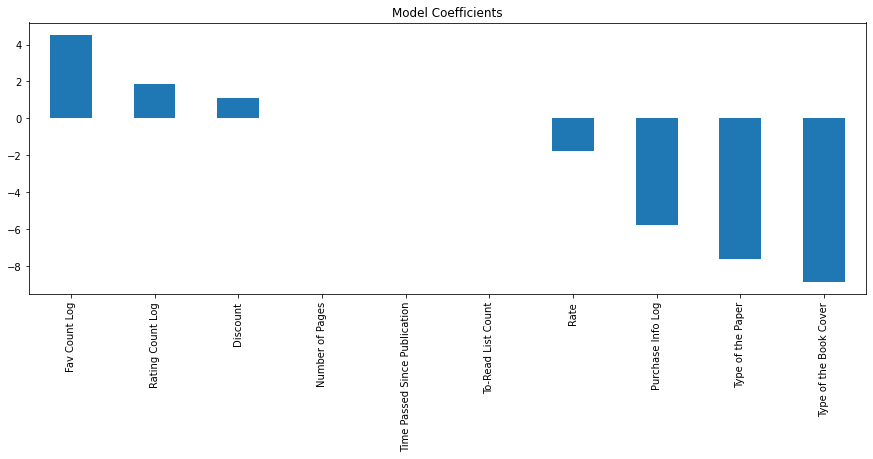

In [ ]:
from pandas import Series

predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[15,5])
coef.plot(kind='bar', title='Model Coefficients');